In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils_exploratory as ue
import utils_modelling as um

In [3]:
df_previous = ue.df_csv("air_system_previous_years.csv" )
df_present = ue.df_csv("air_system_present_year.csv")

In [4]:
print(df_previous.info())
print(df_present.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB
None


In [5]:
print(df_previous.isna().sum())
print(df_present.isna().sum())



class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64
class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64


Temos uma coluna com formato int64 e o resto como object, logo precisamos converter esses dados para poder trabalhar com os valores na

In [6]:
df_present = ue.exchange_dtypes_NaN(df_present)
df_previous = ue.exchange_dtypes_NaN(df_previous)


Coluna class não pôde ser convertida para float64.

DataFrame após a conversão:
      class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg      60     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
1       neg      82     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
2       neg   66002     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
3       neg   59816     NaN  1.010000e+03   936.0     0.0     0.0     0.0   
4       neg    1814     NaN  1.560000e+02   140.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
15995   neg   81852     NaN  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636     NaN  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110     NaN  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0

In [7]:
print(df_previous.dtypes, df_present.dtypes)

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


entender a distribuição de cada coluna:

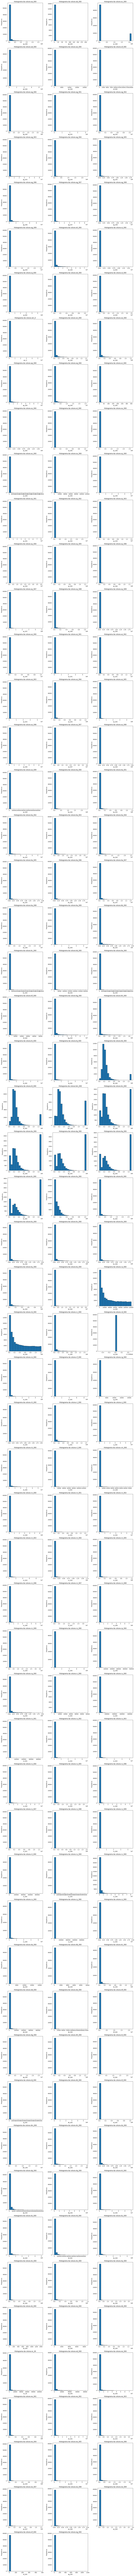

None


In [8]:
ue.subplots_hist(df_previous)

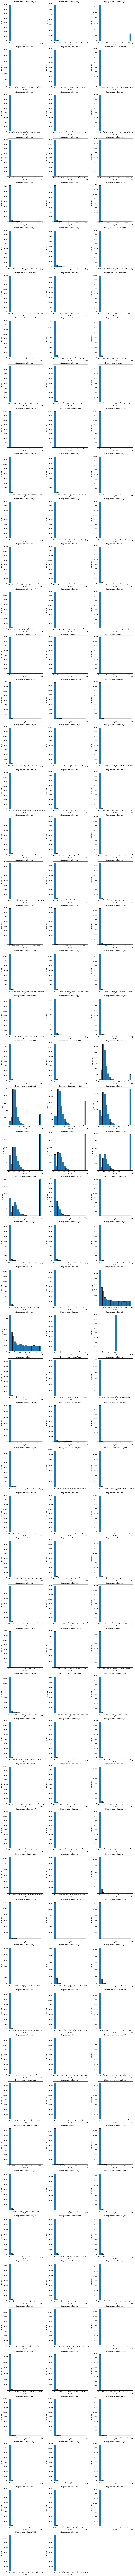

None


In [9]:
ue.subplots_hist(df_present)

In [10]:
is_na_prev = ue.qtd_NaN(df_previous)
is_na_pres = ue.qtd_NaN(df_present)

print(is_na_prev, is_na_pres)

        NaN Sum
class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
...         ...
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723

[171 rows x 1 columns]         NaN Sum
class         0
aa_000        0
ab_000    12363
ac_000      926
ad_000     3981
...         ...
ee_007      192
ee_008      192
ee_009      192
ef_000      762
eg_000      762

[171 rows x 1 columns]


In [11]:
print(ue.col_3seq_na(df_previous))

(['ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ak_000', 'ar_000', 'av_000', 'ax_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bx_000', 'bz_000', 'ca_000', 'cc_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'cl_000', 'cm_000', 'co_000', 'cp_000', 'cr_000', 'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000', 'dd_000', 'de_000', 'df_000', 'dg_000', 'dh_000', 'di_000', 'dj_000', 'dk_000', 'dl_000', 'dm_000', 'do_000', 'dp_000', 'dq_000', 'dr_000', 'ds_000', 'dt_000', 'du_000', 'dv_000', 'dx_000', 'dy_000', 'dz_000', 'ea_000', 'eb_000', 'ec_00', 'ed_000', 'ef_000', 'eg_000'], 70)


In [16]:
df_previous = ue.classe_boll_1(df_previous)
df_previous = ue.classe_boll_0(df_previous)

df_present = ue.classe_boll_1(df_present)
df_present = ue.classe_boll_0(df_present)


In [17]:
print(ue.count_classes(df_previous), ue.count_classes(df_present))

{'num_pos': 1000, 'num_neg': 59000}
{'num_pos': 375, 'num_neg': 15625}
(1000, 59000) (375, 15625)


In [22]:
df_previous_cleaned = um.remove_NaN(df_previous, 0.9)
df_previous_cleaned.shape

(60000, 143)

Mesmo se removessemos as colunas que possuem muitos NaNs ainda teriamos uma dimensionalidade muito elevada, por isso ao longo da modelagem, seram implementadas 3 tecnicas de preenchimento desses NaNs e 2 técnicas de redução de dimensionalidade.
